# Installing and Importing Pyforest

In [55]:
# !pip install pyforest

In [18]:
import pyforest
# lazy_imports()

In [90]:
# importing pyforest
from pyforest import *
# lazy_imports()

['import nltk',
 'import pydot',
 'import spacy',
 'import re',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import gensim',
 'from sklearn.preprocessing import OneHotEncoder',
 'import keras',
 'import lightgbm as lgb',
 'from pathlib import Path',
 'from openpyxl import load_workbook',
 'from sklearn.ensemble import RandomForestRegressor',
 'import glob',
 'import statistics',
 'import dash',
 'import plotly.express as px',
 'from pyspark import SparkContext',
 'import sys',
 'from dask import dataframe as dd',
 'from sklearn import svm',
 'from sklearn.manifold import TSNE',
 'import os',
 'import xgboost as xgb',
 'import tensorflow as tf',
 'import pickle',
 'import plotly.graph_objs as go',
 'import bokeh',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import plotly as py',
 'import tqdm',
 'import awswrangler as wr',
 'import datetime as dt',
 'import sklearn',
 'import numpy as np',
 'import matplotlib as mpl',
 'from sklearn.ensemble import 

# Importing train and test data set

In [73]:
# importing .csv files using Pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
# Checking the top 10 rows
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [75]:
# Checking the name of the columns
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Data Cleaning

In [76]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [77]:
train.drop(columns=['Name','Ticket','Cabin', 'Embarked', 'PassengerId', 'Parch'], inplace=True)

In [79]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 2)

In [80]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [82]:
train.dropna(inplace=True)

# Checking if Matplotlib and Seaborn was correctly imported

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

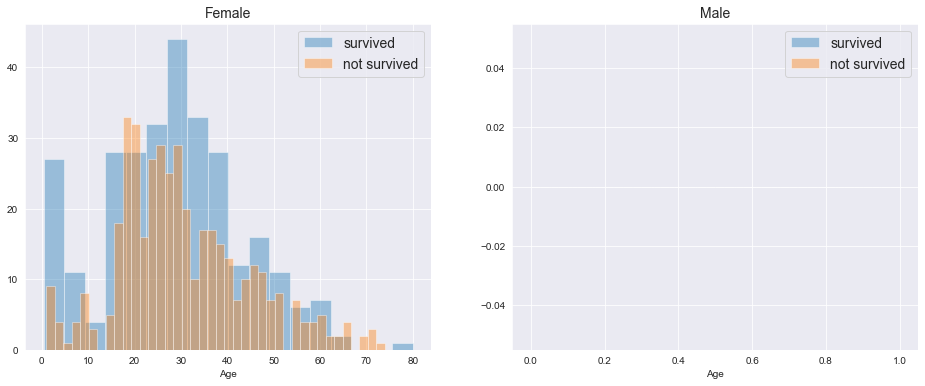

In [83]:
# checking the age and sex
survived = 'survived'
not_survived = 'not survived'

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
women = train[train['Sex']==2]
men = train[train['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend(fontsize=14)
ax.set_title('Female', fontsize=14)
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend(fontsize=14)
_ = ax.set_title('Male', fontsize=14)
plt.show()

# Train Test Split

In [84]:
X = train.drop(['Survived'], axis=1)
y = train.Survived

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<IPython.core.display.Javascript object>

In [93]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

<IPython.core.display.Javascript object>

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [714, 179]